# Check poisson assumptions

In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.path.join('../src'))
sys.path.insert(0, module_path)

import epinorm.data as data
import epinorm.simulation as sim
import scanpy as sc
import episcanpy as epi
import anndata as ad
import seaborn as sns
import matplotlib.pyplot as plt
import epinorm.plots as myplt
from pathlib import Path
import numpy as np
import scipy.stats as stats

In [2]:
file_path=Path('data/mouse_brain_5k/peak_by_cell_filtered.h5ad')

In [3]:
epidata = data.MouseBrainDataset()
# adata = epidata.load_mtx(matrix_path=Path('data/mouse_brain_5k/bin_by_cell.h5ad'))
# adata = epidata.get_window_mtx(matrix_path=Path('data/mouse_brain_5k/10000bin_by_cell.h5ad'), window_size=10000, save=True)
# adata = epidata.get_peak_mtx(matrix_path=Path('data/mouse_brain_5k/peak_by_cell.h5ad'), save=True)
adata = epidata.load_mtx(matrix_path=file_path)

## Check poisson

In [4]:
adata.obs['lib_size'] = adata.X.sum(1)
adata.obs['mean'] = adata.X.mean(1)
adata.obs['var'] = adata.X.power(2).mean(1) - np.square(adata.X.mean(1))

In [5]:
stats.pearsonr(adata.obs['lib_size'], adata.obs['var'])

PearsonRResult(statistic=0.9834348779940072, pvalue=0.0)

In [6]:
stats.pearsonr(adata.obs['lib_size'], adata.obs['mean'])

PearsonRResult(statistic=0.9999999999999967, pvalue=0.0)

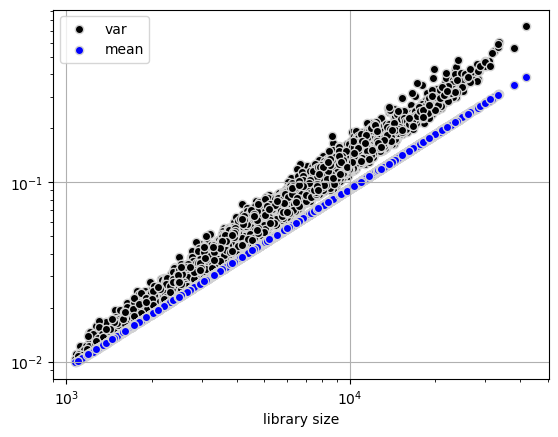

In [12]:
fig = plt.figure()
ax = fig.add_subplot()
ax.grid()
ax.scatter(adata.obs['lib_size'], adata.obs['var'], color='black', edgecolors='lightgrey', label='var')
ax.scatter(adata.obs['lib_size'], adata.obs['mean'], color='blue', edgecolors='lightgrey', label='mean')
ax.set(xscale='log', yscale='log', xlabel='library size',  title = 'Variance/mean ')
ax.legend()

In [8]:
stats.pearsonr(adata.obs['lib_size'], adata.obs['var'] / adata.obs['mean'])

PearsonRResult(statistic=0.4099841090240016, pvalue=4.4791939841897045e-145)

[None]

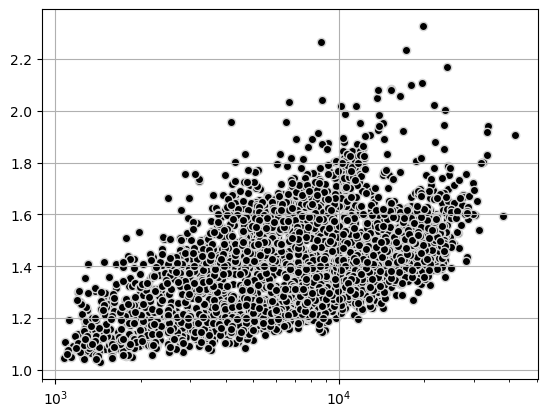

In [9]:
fig = plt.figure()
ax = fig.add_subplot()
ax.grid()
ax.scatter(adata.obs['lib_size'], adata.obs['var'] / adata.obs['mean'], color='black', edgecolors='lightgrey')
ax.set(xscale='log')

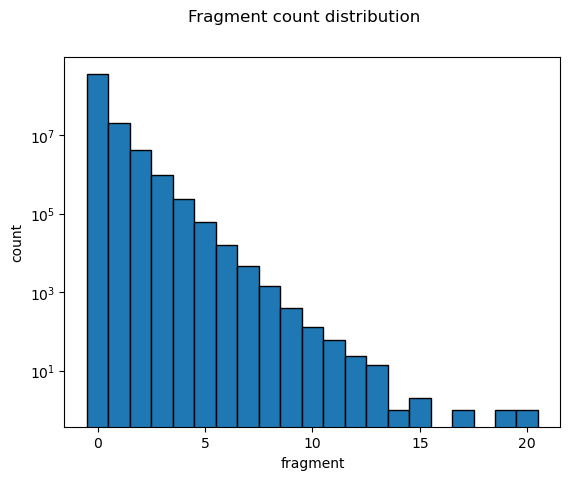

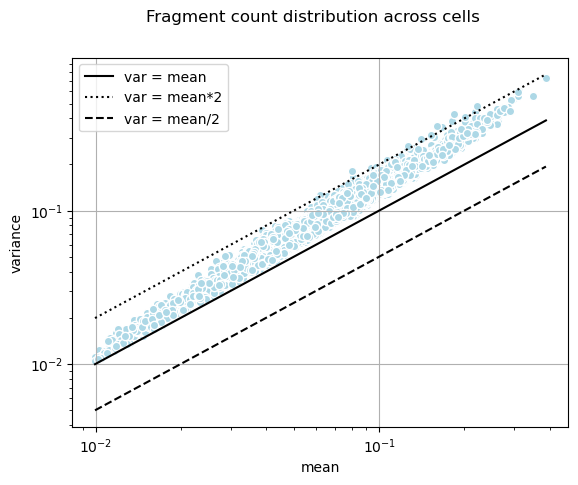

In [10]:
adata_tmp = adata.copy()
# epi.pp.set_filter(adata_tmp, "n_counts", max_threshold=5000)
# adata_tmp = epi.pp.apply_filters(adata_tmp, verbose=True)
myplt.plot_count_distribution(adata_tmp, title='Fragment count distribution')
myplt.plot_count_mean_var(adata_tmp, title='Fragment count distribution across cells')

1416 of 3577 observations remain (-2161)
1416 of 3577 observations remain (-2161)
108390 of 108390 features remain (0)


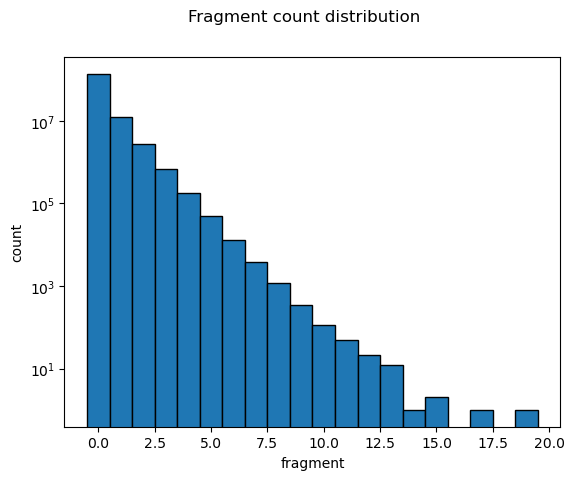

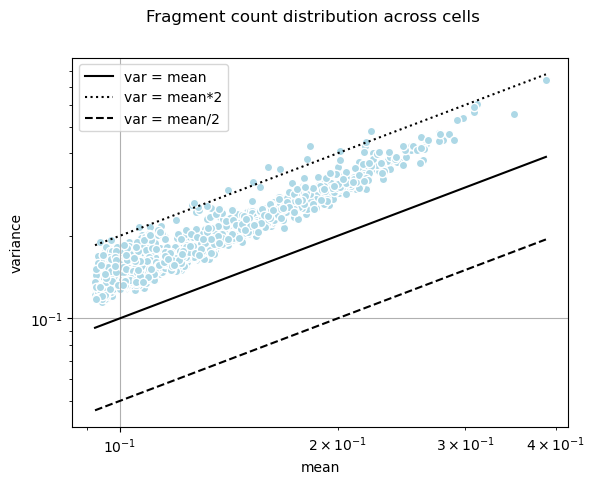

In [13]:
adata_tmp = adata.copy()
epi.pp.set_filter(adata_tmp, "n_counts", min_threshold=1e4)
adata_tmp = epi.pp.apply_filters(adata_tmp, verbose=True)
myplt.plot_count_distribution(adata_tmp, title='Fragment count distribution')
myplt.plot_count_mean_var(adata_tmp, title='Fragment count distribution across cells')